# Physics 760: Computational Physics
## WS 2022/23
### Week 2
#### Pugazharasu Anancia Devaneyan, Rishi Kumar Senthil Kumar

In [1]:
#setup the notebook
%pylab inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math as mth
from scipy import special

Populating the interactive namespace from numpy and matplotlib


# Simulating the Ising model in $d=2$ using the Metropolis-Hasting algorithm

First we define what energy difference i.e. $\Delta S$ that was defined in the lecture to be numerically.

In [2]:
def deltaE(S0, Sn, J, H):

    '''Energy difference for a spin flip'''
    
    return 2 * S0 * (H + J * Sn)

Now we implement Metropolis-Hastings algorithm as detailled in the lecture.

In [9]:
def accept_reject(sweeps, N, beta, J, h, freq=10):
    
    
    spin_list = 2*np.random.randint(2, size=(N,N)) - 1
    final_config = spin_list
    for i in range(sweeps):
        spin_flip_i = np.random.randint(N)
        spin_flip_j = np.random.randint(N)
        
        Sn = spin_list[(spin_flip_i - 1) % N, spin_flip_j] + spin_list[(spin_flip_i + 1) % N, spin_flip_j] + \
             spin_list[spin_flip_i, (spin_flip_j - 1) % N] + spin_list[spin_flip_i, (spin_flip_j + 1) % N]

        change_E = deltaE(spin_list[spin_flip_i,spin_flip_j],Sn,J,h)
        
        rand = np.random.random()
        
        if rand<min(1,np.exp(-beta*(change_E))) :
            #flip the spin
            spin_list[spin_flip_i,spin_flip_j]*=-1
        else:
            pass
    
    return spin_list

## Magnetization

In [10]:
def exact_magnetization(J_coup,h_coup,Temp,N_sites):
    beta = 1/Temp
    sin_term = np.sinh(h_coup*beta)
    cosine_term = np.cosh(h_coup*beta)
    lambda_plus = (np.exp(J_coup*beta))*(cosine_term + np.sqrt((sin_term**2)+np.exp(-4*J_coup*Temp)))
    lambda_minus = (np.exp(J_coup*beta))*(cosine_term - np.sqrt((sin_term**2)+np.exp(-4*J_coup*Temp)))
    ratio = (lambda_minus/lambda_plus)**N_sites
    mag = (sin_term/(np.sqrt((sin_term**2)+np.exp(-4*J_coup*Temp))))*((1-ratio)/(1+ratio))
    return mag

We can calculate the magnetization at the thermodynamic limit by taking the limit $\lim_{N \rightarrow \infty}$ for the previous expression.

In [11]:
def thermo_magnetization(J_coup,h_coup,Temp):
    sine_term = mth.sin(h_coup/Temp)
    cosine_term = mth.cos(h_coup/Temp)
    exp_term = mth.exp(-4*(J_coup/Temp))
    mag = (sine_term + ((sine_term * cosine_term)/(mth.sqrt((sine_term**2)+exp_term))))/(cosine_term + mth.sqrt((sine_term**2)+exp_term))
    return mag

In [55]:
def numerical_mag(lattice, N):
    mag = 0
    for i in range(N):
        for j in range(N):
            mag += lattice[i,j]
    mag = mag/(N)
    return mag

In [61]:
h_input = np.linspace(-1,1,100)
h_fixed = 0.5
N_fixed = 20
N_input = [2,3,4,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
Temp_set = 0.75
J_input_1 = np.linspace(0.25,2,100)
J_input_2 = np.linspace(0.25,1,100)
J_fixed = 0.5
sweeps = N_fixed*100
beta = 1/Temp_set

In [14]:
m_thermo_1 = []
m_exact_1 = []
for i in h_input:
    m_thermo_1.append(thermo_magnetization(J_fixed,float(i),Temp_set))
    m_exact_1.append(exact_magnetization(J_fixed,i,Temp_set,N_fixed))

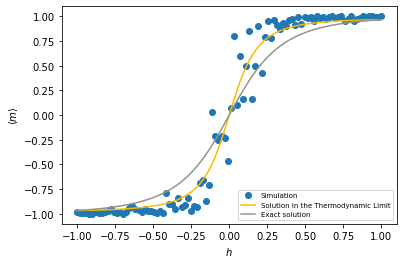

In [23]:
m_vs_h = []
for h in h_input:
   m_h = accept_reject(sweeps, N_fixed, beta, J_fixed,h)
   mean_m = np.mean(m_h[len(m_h)//2:])
   m_vs_h.append(mean_m)


plt.plot(h_input,m_vs_h,marker='o',label="Simulation",linestyle='')
plt.plot(h_input, m_thermo_1, color ='#fbbb00', label='Solution in the Thermodynamic Limit')
plt.plot(h_input, m_exact_1, color = '#949387', label='Exact solution')

plt.xlabel('$h$')
plt.ylabel('$\\langle m \\rangle$')
plt.legend(loc='lower right',prop={'size': 7})
plt.savefig('m_v_h.png')

### Absolute Magnetization

In [39]:
def numerical_abs_mag(lattice, J,N):
    mag_sum = 0
    if J > 0.440686793509772:
        for i in range(N):
            for j in range(N):
                mag_sum += np.absolute(lattice[i,j])
        mag_sum = mag_sum/(N*N)
        return mag_sum
    else:
        return 0

In [17]:
def mag_absolute_exact(J):
    if J > 0.440686793509772:
        absolute_exact_mag = (1- (1/(np.sinh(2*J)**4)))**(1/8)
        return absolute_exact_mag
    else:
        return 0

In [28]:
m_absolute_1 = []
for j in J_input:
    m_absolute_1.append(mag_absolute_exact(j))
    
m_abs_vs_h = []
for j in J_input:
   m_a_h = numerical_abs_mag(accept_reject(sweeps, N_fixed, beta, j,0),j,N_fixed)
   m_abs_vs_h.append(m_a_h)

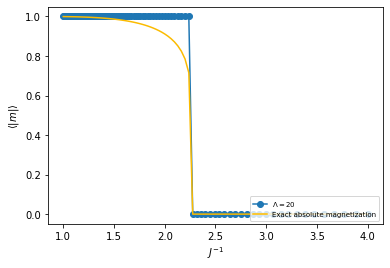

In [50]:
plt.plot(np.reciprocal(J_input),m_abs_vs_h,'o-',label='$\\Lambda = 20$')
plt.plot(np.reciprocal(J_input), m_absolute_1, color ='#fbbb00', label='Exact absolute magnetization')

plt.xlabel('$J^{-1}$')
plt.ylabel('$\\langle | m |\\rangle$')
plt.legend(loc='lower right',prop={'size': 7})
plt.savefig('abs_m_v_J.png')

In [58]:
m_absolute_2 = []
for j in J_input:
   m_a_h_2 = accept_reject(sweeps, N_fixed, beta, j,0)
   mean_m_2 = np.mean(m_h[len(m_h)//2:])
   m_absolute_2.append(mean_m_2)
   
m_thermo_2 = []
m_exact_2 = []
for j in J_input:
    m_thermo_1.append(thermo_magnetization(j,float(i),Temp_set))
    m_exact_1.append(exact_magnetization(j,i,Temp_set,N_fixed))

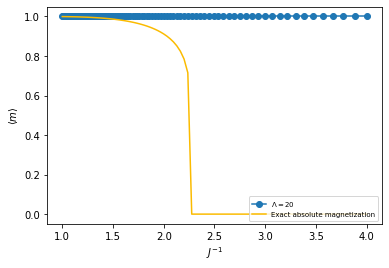

In [59]:
plt.plot(np.reciprocal(J_input),m_absolute_2,'o-',label='$\\Lambda = 20$')
plt.plot(np.reciprocal(J_input), m_absolute_1, color ='#fbbb00', label='Exact absolute magnetization')

plt.xlabel('$J^{-1}$')
plt.ylabel('$\\langle m \\rangle$')
plt.legend(loc='lower right',prop={'size': 7})
plt.savefig('m_v_h.png')

## Energy

In [94]:
def energy_exact(J):
    exact_energy = (-J*(1/np.tanh(2*J)))*(1 + (2/np.pi)*((2*(np.tanh(2*J)**2)-1)*(sp.special.ellipkm1(4*((1/np.cosh(2*J))**2)*(np.tanh(2*J)**2)))))
    return exact_energy

In [124]:
def energy_numeric(config,j,N):
    energy = 0 
    
    for i in range(N):
        for j in range(N):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -1*nb*S
    return energy/(N**2)

In [125]:
e_num = []
for j in J_input_2:
   numeric_e = energy_numeric(accept_reject(sweeps, N_fixed, beta, j,0),j,N_fixed)
   e_num.append(numeric_e)
   
e_exact = []
for j in J_input_2:
    e_exact.append(energy_exact(j))

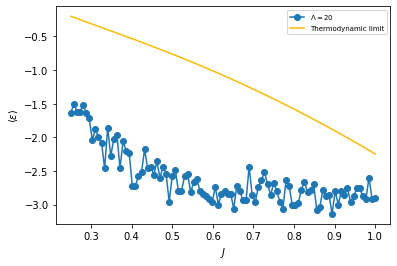

In [126]:
plt.plot(J_input_2,e_num,'o-',label='$\\Lambda = 20$')
plt.plot(J_input_2, e_exact, color ='#fbbb00', label='Thermodynamic limit')

plt.xlabel('$J$')
plt.ylabel('$\\langle \\epsilon \\rangle$')
plt.legend(loc='upper right',prop={'size': 7})
plt.savefig('e_v_j.png')

## Specific Heat

In [ ]:
def energy_numeric_square(config,N):
    energy = 0 
    
    for i in range(N):
        for j in range(N):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/2.  # to compensate for over-counting

In [3]:
def heat_exact(J):
    k = (2*np.sinh(2*J))/(np.cosh(2*J)**2)
    first_term = sp.special.ellipkm1(k**2) - sp.special.ellipe(k**2) - (1- (np.tanh(2*J)**2))
    second_term = (np.pi/2) + ((2*(np.tanh(2*J)**2))- 1)*(sp.special.ellipkm1(k**2))
    exact_heat = ((4*(J**2))/(np.pi*(np.tanh(2*J)**2))) * first_term * second_term
    return exact_heat/(J**2)

In [ ]:
def heat_numeric(config,J,N):
    heat = (energy_numeric_square(config,N) - )/(J**2)

In [ ]:
m_thermo_1 = []
m_exact_1 = []
for i in h_input:
    m_thermo_1.append(thermo_magnetization(J_fixed,float(i),Temp_set))
    m_exact_1.append(exact_magnetization(J_fixed,i,Temp_set,N_fixed)/100)

In [ ]:
def heat(N, J):
    heat = N * (energy(J**2)-(energy(J)**2))
    return heat

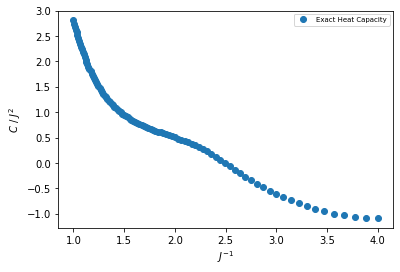

In [8]:
c_vs_J_exact = []
for j in J_input:
    #m_h = accept_reject(sweeps, N_fixed, beta, J_fixed,h)
    c_vs_J_exact.append(heat_exact(j))


#plt.plot(h_input,m_vs_h,marker='o',label="Simulation",linestyle='')
plt.plot(np.reciprocal(J_input), c_vs_J_exact, marker='o',label="Exact Heat Capacity",linestyle='')
#plt.plot(c_vs_J, J_input, color ='#fbbb00', label='Solution in the Thermodynamic Limit')
#plt.plot(h_input, m_exact_1, color = '#949387', label='Exact solution')

plt.xlabel('$J^{-1}$')
plt.ylabel('$C \ / \ J^{2}$')
plt.legend(loc='upper right',prop={'size': 7})
plt.savefig('m_v_h.png')

# Error estimate

We shall now estimate the error in our simulation by measuring residual standard deviation of our simulation from what we expect in the thermodynamic limit.

In [85]:
error_sum = 0
for value in h_input:
    avg = accept_reject(sweeps, N_fixed, beta, J_fixed,value)
    mean = np.mean(avg[len(avg)//2:])
    error_sum = (thermo_magnetization(J_fixed,value,Temp_set) - mean)**2
error = mth.sqrt(error_sum/(N_fixed-2))
display(error)

0.0006000102693923783